In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import json
import os
import scipy.stats as stats

import statsmodels.api as sm
s=json.load(open('pui.json'))
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [95]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

In [96]:
allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

In [97]:
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [98]:
from pandas.tools.plotting import scatter_matrix

In [99]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

C:\Users\PRIYA  SINGH\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
k=allmales['white']['Median income']
k.dropna()


1     40122
2     44882
3     45554
4     20445
5      3737
6     16625
7      8381
8      1662
9     10759
10    10599
11    12494
12     4262
13     4915
14     1730
15     1463
16     1943
17     2471
18    17434
19    11920
20    29225
21    22025
22    26812
23    37187
24     8374
25    11884
26    12174
27    17446
28    11798
29    29375
30    22590
31    26868
32    37724
33    13975
35     2579
36     5336
37     4076
38     1772
40    35621
41    39531
42    16698
43    20481
44    16561
45     7988
46    16272
47    14924
Name: Median income, dtype: float64

In [114]:
X=allfemales['white']['Median income'].convert_objects(convert_numeric=True)
Y=allmales['white']['Median income'].convert_objects(convert_numeric=True)


In [115]:
print X.head()
print Y.head()

0      NaN
1    23780
2    30626
3    30919
4    10328
Name: Median income, dtype: float64
0      NaN
1    40122
2    44882
3    45554
4    20445
Name: Median income, dtype: float64


In [116]:
print len(Y)
print len(X)
X=X.dropna()
Y=Y.dropna()
X=X[:45]
print len(Y)

print len(X)
X=list(X)
Y=list(Y)
print len(Y)

print len(X)
print type(X)

49
49
45
45
45
45
<type 'list'>


In [117]:
print X, Y

[23780.0, 30626.0, 30919.0, 10328.0, 1645.0, 12038.0, 7812.0, 2205.0, 12827.0, 8195.0, 9496.0, 4005.0, 3407.0, 1650.0, 1420.0, 1899.0, 2491.0, 10286.0, 6441.0, 17934.0, 10843.0, 17748.0, 13366.0, 4648.0, 10013.0, 6732.0, 10426.0, 5921.0, 23354.0, 14612.0, 18777.0, 13563.0, 3522.0, 8011.0, 4255.0, 4885.0, 4512.0, 1938.0, 21500.0, 23998.0, 12055.0, 13451.0, 11848.0, 6517.0, 11755.0] [40122.0, 44882.0, 45554.0, 20445.0, 3737.0, 16625.0, 8381.0, 1662.0, 10759.0, 10599.0, 12494.0, 4262.0, 4915.0, 1730.0, 1463.0, 1943.0, 2471.0, 17434.0, 11920.0, 29225.0, 22025.0, 26812.0, 37187.0, 8374.0, 11884.0, 12174.0, 17446.0, 11798.0, 29375.0, 22590.0, 26868.0, 37724.0, 13975.0, 2579.0, 5336.0, 4076.0, 1772.0, 35621.0, 39531.0, 16698.0, 20481.0, 16561.0, 7988.0, 16272.0, 14924.0]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     276.0
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           1.42e-20
Time:                        23:17:20   Log-Likelihood:                -466.94
No. Observations:                  45   AIC:                             935.9
Df Residuals:                      44   BIC:                             937.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4909      0.090     16.613      0.0

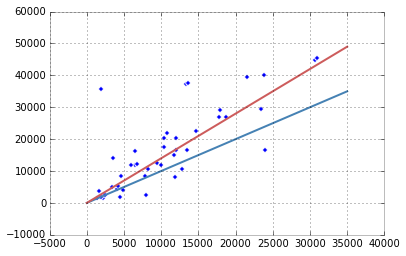

In [131]:
ax1=plt.subplot()

ax1.scatter(X,Y)
x=np.linspace(0,35000,1000)
y=x
model=sm.OLS(Y,X)
results=model.fit()
print results.summary()
fig1=figure(figsize=(10,10))
#m=sm.add_constant(X)
x1=np.linspace(0,35000,1000)
y1=1.4*x
#k=sm.graphics.plot_fit(results, 0, ax=ax1)
ax1.plot(x,y)
ax1.plot(x1,y1)
plt.show()


In [136]:

cor = stats.spearmanr(X,Y)
std(Y)/std(X)
beta1=cor[0]*std(X)/std(Y)
beta0=mean(X)-beta1*mean(Y)

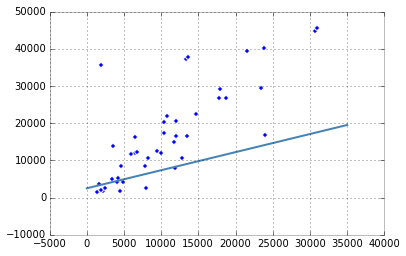

In [139]:
ax1=plt.subplot()

ax1.scatter(X,Y)
x=np.linspace(0,35000,1000)
y=beta1*x +beta0
ax1.plot(x,y)

In [147]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())
type(all_males)

numpy.ma.core.MaskedArray

In [156]:
allmask = [(np.isnan(all_males)) + (np.isnan(all_females))]

all_females.mask = allmask
all_males.mask = allmask

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [151]:
np.isnan(all_males)

masked_array(data = [True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False True False
 False False False True False False False False False False False False
 True True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False True
 False False False False True False False False False False False False
 False True True False False False False False False False False False True
 False False False False False False False False False False False False
 True True True True False False False False False True True True True
 False False True True False False False False False False False False True
 True False False False False False False False False False True False
 False False False False False False